# Proyek Analisis Data: Air Quality Index (PM2.5)
- **Nama:** Rava Maulana
- **Email:** ravamaulana14@gmail.com
- **ID Dicoding:** rma1403

## Menentukan Pertanyaan Bisnis

Pertanyaan bisnis yang dibuat mengacu pada framework SMART untuk menghasilkan pertanyaan yang baik dan efektif. Pertanyaan
yang efektif akan menghasilkan insight menarik dari dataset yang dianalisis. Berikut merupakan dua pertanyaan yang diajukan
untuk membantu menganalisis data.

1. **Apakah terdapat pola harian tingkat PM2.5 pada setiap stasiun?**  
  Pertanyaan ini bertujuan untuk mengeksplorasi pola atau siklus yang mungkin muncul terhadap tingkat PM2.5. Dengan diketahuinya
  pola harian pada tingkat PM2.5 untuk setiap stasiun, perencanaan untuk meningkatkan kualitas udara dapat difokuskan pada jam-jam
  dengan tingkat PM2.5 tertinggi. Jika ditemukan pola yang lebih general antar-statsiun pengukuran, upaya peningkatan kualitas
  udara dapat dilakukan dengan skala yang lebih masif.

3. **Bagaimana perbandingan tingkat PM2.5 antara stasiun dengan tingkat PM2.5 tertinggi dan terendah?**  
  Pertanyaan ini bertujuan untuk menemukan faktor-faktor yang mempengaruhi tingginya tingkat PM2.5. Dengan ditemukannya beberapa
  faktor yang menyebabkan tingginya tingkat PM2.5, diharapkan gap antara stasiun dengan tingkat PM2.5 tertinggi dan terendah dapat
  dikurangi sehingga tingkat PM2.5 secara keseluruhan dapat mengalami penurunan.

## Import Semua Packages/Library yang Digunakan

In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
DATA_FOLDER = "PRSA_Data_20130301-20170228"
SAMPLE_DATA_1 = "PRSA_Data_Aotizhongxin_20130301-20170228.csv"
SAMPLE_DATA_2 = "PRSA_Data_Changping_20130301-20170228.csv"

## Data Wrangling

### Gathering Data

Proses pengumpulan data dilakukan dengan menggabungkan beberapa file csv menjadi satu DataFrame. Secara keseluruhan, terdapat 12
file csv yang berisi hasil pengukuran kadar zat di udara pada setiap stasiun pengukuran.

In [3]:
files = os.listdir(DATA_FOLDER)
dataset = pd.read_csv(os.path.join(DATA_FOLDER, files[0]))
for file in files[1:]:
    temp_df = pd.read_csv(os.path.join(DATA_FOLDER, file))
    dataset = pd.concat([dataset, temp_df], ignore_index=True)

Dilakukan inspeksi 5 data pertama pada dataset untuk melihat kolom-kolom yang ada serta tipe data yang ada pada setiap kolom.

In [4]:
dataset.head()

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    6.0  18.0  5.0  NaN  800.0  88.0   0.1   
1   2  2013      3    1     1    6.0  15.0  5.0  NaN  800.0  88.0  -0.3   
2   3  2013      3    1     2    5.0  18.0  NaN  NaN  700.0  52.0  -0.7   
3   4  2013      3    1     3    6.0  20.0  6.0  NaN    NaN   NaN  -1.0   
4   5  2013      3    1     4    5.0  17.0  5.0  NaN  600.0  73.0  -1.3   

     PRES  DEWP  RAIN   wd  WSPM  station  
0  1021.1 -18.6   0.0   NW   4.4  Gucheng  
1  1021.5 -19.0   0.0   NW   4.0  Gucheng  
2  1021.5 -19.8   0.0  WNW   4.6  Gucheng  
3  1022.7 -21.2   0.0    W   2.8  Gucheng  
4  1023.0 -21.4   0.0  WNW   3.6  Gucheng

Dilakukan inspeksi terhadap dimensi dataset untuk mengetahui jumlah kolom serta jumlah instance data pada dataset.

In [5]:
dataset.shape

(420768, 18)

Dilakukan penambahan kolom "datetime" untuk menggabungkan seluruh komponen waktu pada dataset. Hal ini dilakukan untuk
mempermudah pemrosesan data yang merupakan data timeseries.

In [6]:
dataset["datetime"] = pd.to_datetime(dataset[["year", "month", "day", "hour"]])
dataset.drop(["year", "month", "day", "hour"], axis=1, inplace=True)

In [7]:
dataset.head()

No  PM2.5  PM10  SO2  NO2     CO    O3  TEMP    PRES  DEWP  RAIN   wd  \
0   1    6.0  18.0  5.0  NaN  800.0  88.0   0.1  1021.1 -18.6   0.0   NW   
1   2    6.0  15.0  5.0  NaN  800.0  88.0  -0.3  1021.5 -19.0   0.0   NW   
2   3    5.0  18.0  NaN  NaN  700.0  52.0  -0.7  1021.5 -19.8   0.0  WNW   
3   4    6.0  20.0  6.0  NaN    NaN   NaN  -1.0  1022.7 -21.2   0.0    W   
4   5    5.0  17.0  5.0  NaN  600.0  73.0  -1.3  1023.0 -21.4   0.0  WNW   

   WSPM  station            datetime  
0   4.4  Gucheng 2013-03-01 00:00:00  
1   4.0  Gucheng 2013-03-01 01:00:00  
2   4.6  Gucheng 2013-03-01 02:00:00  
3   2.8  Gucheng 2013-03-01 03:00:00  
4   3.6  Gucheng 2013-03-01 04:00:00

### Assessing Data

Dilakukan inspeksi terhadap nilai null untuk setiap kolom pada dataset. Ditemukan bahwa kolom yang memiliki data null terbanyak adalah
"CO" dengan data null sebanyak 20.701 instance. Berdasarkan analisis ini juga ditemukan bahwa sebagian besar (15 dari 18) kolom memiliki
data null sehingga perlu dilakukan cleaning nilai null pada dataset. 

In [8]:
dataset.isnull().sum()

No              0
PM2.5        8739
PM10         6449
SO2          9021
NO2         12116
CO          20701
O3          13277
TEMP          398
PRES          393
DEWP          403
RAIN          390
wd           1822
WSPM          318
station         0
datetime        0
dtype: int64

Dilakukan inspeksi terhadap duplikasi data pada dataset. Berdasarkan inspeksi, tidak ditemukan data duplikat pada dataset
yang berarti tidak diperlukannya cleaning terhadap data duplikat.

In [9]:
dataset.duplicated().sum()

0

In [10]:
for column in dataset.select_dtypes(include=np.number):
    sample = dataset[column].dropna()
    
    q25, q75 = np.percentile(sample, 25), np.percentile(sample,75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off

    outliers = [x for x in sample if x > maximum or x < minimum]
    print(f"{column}: {len(outliers)} outliers of {len(sample)} samples ({(len(outliers)/len(sample)*100):.2f}%)")

No: 0 outliers of 420768 samples (0.00%)
PM2.5: 19142 outliers of 412029 samples (4.65%)
PM10: 14658 outliers of 414319 samples (3.54%)
SO2: 35566 outliers of 411747 samples (8.64%)
NO2: 7021 outliers of 408652 samples (1.72%)
CO: 28054 outliers of 400067 samples (7.01%)
O3: 16599 outliers of 407491 samples (4.07%)
TEMP: 0 outliers of 420370 samples (0.00%)
PRES: 0 outliers of 420375 samples (0.00%)
DEWP: 0 outliers of 420365 samples (0.00%)
RAIN: 16520 outliers of 420378 samples (3.93%)
WSPM: 23079 outliers of 420450 samples (5.49%)


### Cleaning Data

In [11]:
for column in dataset.select_dtypes(include=np.number):
    dataset[column] = dataset[column].fillna(value=dataset[column].median())

for column in dataset.select_dtypes(exclude=np.number):
    dataset[column] = dataset[column].fillna(value=dataset[column].mode()[0])

dataset.isnull().sum()

No          0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
datetime    0
dtype: int64

## Exploratory Data Analysis (EDA)

In [12]:
dataset.describe(include="all")

No          PM2.5           PM10            SO2  \
count   420768.000000  420768.000000  420768.000000  420768.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean     17532.500000      79.278489     104.256193      15.641507   
min          1.000000       2.000000       2.000000       0.285600   
25%       8766.750000      21.000000      36.000000       3.000000   
50%      17532.500000      55.000000      82.000000       7.000000   
75%      26298.250000     109.000000     144.000000      19.000000   
max      35064.000000     999.000000     999.000000     500.000000   
std      10122.116943      80.056799      91.108745      21.455419   

                  NO2             CO             O3           TEMP  \
count   420768.000000  420768.000000  420768.000000  420768.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean        50.418633    1214.493362      56.981874      13.539885   
min          1.026500     100.000000       0.214200     -19.900000   
25%         24.000000     500.000000      12.000000       3.100000   
50%         43.000000     900.000000      45.000000      14.500000   
75%         70.000000    1500.000000      80.000000      23.200000   
max        290.000000   10000.000000    1071.000000      41.600000   
std         34.642023    1133.542988      55.802413      11.430768   

                 PRES           DEWP           RAIN      wd           WSPM  \
count   420768.000000  420768.000000  420768.000000  420768  420768.000000   
unique            NaN            NaN            NaN      16            NaN   
top               NaN            NaN            NaN      NE            NaN   
freq              NaN            NaN            NaN   45157            NaN   
mean      1010.746658       2.491405       0.064416     NaN       1.729461   
min        982.400000     -43.400000       0.000000     NaN       0.000000   
25%       1002.300000      -8.900000       0.000000     NaN       0.900000   
50%       1010.400000       3.100000       0.000000     NaN       1.400000   
75%       1019.000000      15.100000       0.000000     NaN       2.200000   
max       1042.800000      29.100000      72.500000     NaN      13.200000   
std         10.469168      13.787252       0.820626     NaN       1.245947   

        station                       datetime  
count    420768                         420768  
unique       12                            NaN  
top     Gucheng                            NaN  
freq      35064                            NaN  
mean        NaN  2015-03-01 11:30:00.000001024  
min         NaN            2013-03-01 00:00:00  
25%         NaN            2014-03-01 05:45:00  
50%         NaN            2015-03-01 11:30:00  
75%         NaN            2016-02-29 17:15:00  
max         NaN            2017-02-28 23:00:00  
std         NaN                            NaN

In [13]:
dataset.select_dtypes(include=np.number).corr()

No     PM2.5      PM10       SO2       NO2        CO        O3  \
No     1.000000 -0.023707 -0.044208 -0.223036 -0.044587  0.029085 -0.048520   
PM2.5 -0.023707  1.000000  0.879347  0.478022  0.658526  0.767240 -0.147683   
PM10  -0.044208  0.879347  1.000000  0.458764  0.645862  0.686253 -0.109919   
SO2   -0.223036  0.478022  0.458764  1.000000  0.491557  0.523455 -0.161700   
NO2   -0.044587  0.658526  0.645862  0.491557  1.000000  0.687864 -0.463401   
CO     0.029085  0.767240  0.686253  0.523455  0.687864  1.000000 -0.303764   
O3    -0.048520 -0.147683 -0.109919 -0.161700 -0.463401 -0.303764  1.000000   
TEMP  -0.122268 -0.130825 -0.095674 -0.318509 -0.273557 -0.318067  0.585811   
PRES   0.188140  0.019235 -0.017542  0.220741  0.171171  0.184148 -0.439053   
DEWP  -0.101874  0.112726  0.069735 -0.264385 -0.030747 -0.056701  0.307427   
RAIN   0.004814 -0.014315 -0.026355 -0.039852 -0.043241 -0.012842  0.023322   
WSPM   0.054066 -0.269476 -0.182290 -0.107337 -0.393955 -0.288682  0.292592   

           TEMP      PRES      DEWP      RAIN      WSPM  
No    -0.122268  0.188140 -0.101874  0.004814  0.054066  
PM2.5 -0.130825  0.019235  0.112726 -0.014315 -0.269476  
PM10  -0.095674 -0.017542  0.069735 -0.026355 -0.182290  
SO2   -0.318509  0.220741 -0.264385 -0.039852 -0.107337  
NO2   -0.273557  0.171171 -0.030747 -0.043241 -0.393955  
CO    -0.318067  0.184148 -0.056701 -0.012842 -0.288682  
O3     0.585811 -0.439053  0.307427  0.023322  0.292592  
TEMP   1.000000 -0.813297  0.820115  0.037629  0.033025  
PRES  -0.813297  1.000000 -0.750212 -0.060945  0.065085  
DEWP   0.820115 -0.750212  1.000000  0.086288 -0.296516  
RAIN   0.037629 -0.060945  0.086288  1.000000  0.021022  
WSPM   0.033025  0.065085 -0.296516  0.021022  1.000000

## Visualization & Explanatory Analysis

### Apakah terdapat pola harian tingkat PM2.5 pada setiap stasiun?

In [14]:
def get_station_date_range(start_date, end_date, station):
    temp_df = dataset.loc[(dataset["datetime"] >= start_date) & (dataset["datetime"] <= end_date) & (dataset["station"] == station)].copy()
    temp_df["hour"] = temp_df["datetime"].dt.hour
    return temp_df

def plot_pm10(start_date, end_date):
    gucheng_visual_df = get_station_date_range(start_date, end_date, "Gucheng")
    huairou_visual_df = get_station_date_range(start_date, end_date, "Huairou")

    visual_df = pd.concat([gucheng_visual_df, huairou_visual_df], ignore_index=True)
    
    sns.lineplot(data=visual_df, x="hour", y="PM2.5", hue="station")
    plt.xlabel("Date")
    plt.xticks(rotation=45)
    plt.xticks(range(0, 24, 2))
    plt.show()

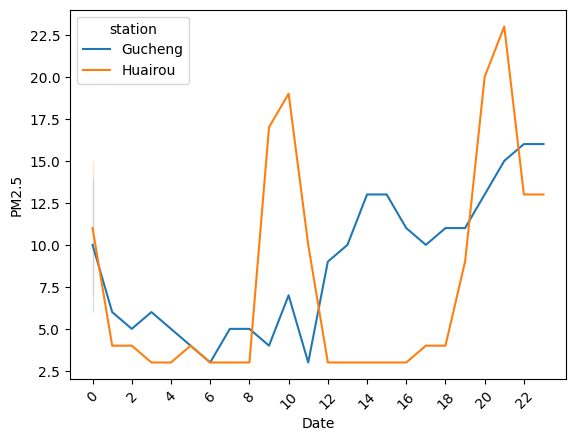

In [15]:
plot_pm10("2013-03-01 00:00:00", "2013-03-02 00:00:00")

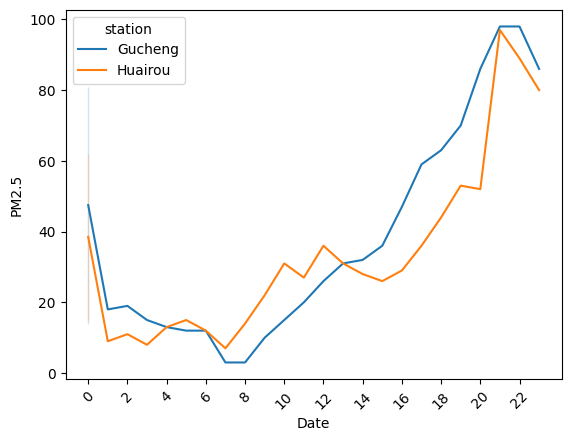

In [16]:
plot_pm10("2013-03-02 00:00:00", "2013-03-03 00:00:00")

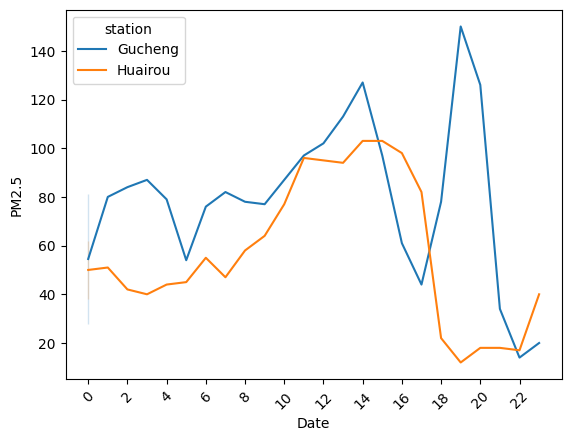

In [17]:
plot_pm10("2013-03-03 00:00:00", "2013-03-04 00:00:00")

Analisis dilakukan dengan **membandingkan hasil pengukuran tingkat PM2.5 pada dua stasiun pengukuran**, Gucheng dan Huairou. Pemilihan kedua
stasiun dilakukan secara acak. Dilakukan plotting tingkat PM2.5 setiap jam dalam rentang waktu 24 jam. Plotting dilakukan pada data 3 hari
yang berurutan, yaitu tanggal 1 Maret 2013, 2 Maret 2013, dan 3 Maret 2013. Pemilihan tanggal dilakukan secara acak tetapi dipilih hari-hari
yang berdekatan untuk mengurangi kemungkinan faktor-faktor eksternal mempengaruhi pola harian tingkat PM2.5, seperti kejadian yang tak terduga
ataupun bencana alam.

Berdasarkan analisis, **tidak ditemukan pola berulang yang muncul harian pada data**. Dengan tidak adanya pola ini, dapat disimpulkan bahwa
tingkat PM2.5 yang muncul disebabkan oleh faktor yang lebih kompleks yang cenderung bersifat acak. Walaupun tidak ada pola harian berulang
yang muncul, terdapat dua insight yang dapat diambil.
1. **Tingkat PM2.5 antar stasiun cenderung memiliki tren yang sama**. Jika tingkat PM2.5 sedang mengalami kenaikan pada satu waktu untuk satu stasiun,
   tingkat PM2.5 pada stasiun lain juga akan cenderung mengalami kenaikan. Hal ini menunjukkan bahwa perubahan tingkat PM2.5 terjadi dalam cakupan
   geografis yang luas.

2. **Tingkat PM2.5 memiliki tren yang menaik dari waktu ke waktu**. Tren kenaikan ini terjadi pada seluruh stasiun pengukuran yang ada. Hal ini
   menunjukkan bahwa kualitas udara dari waktu ke waktu semakin buruk sehingga diperlukan upaya untuk menghentikan kenaikan tingkat PM2.5 ini.
   Upaya yang dibutuhkan harus mencakup lokasi geografis yang luas karena kenaikan tingkat PM2.5 terjadi pada seluruh stasiun pengukuran.

### Bagaimana perbandingan tingkat PM2.5 antara stasiun dengan tingkat PM2.5 tertinggi dan terendah?

In [18]:
highest = dataset.groupby(by="station")["PM2.5"].mean().idxmax()
lowest = dataset.groupby(by="station")["PM2.5"].mean().idxmin()

print(f"Station with the worst air quality: {highest}")
print(f"Station with the best air quality: {lowest}")

Station with the worst air quality: Dongsi
Station with the best air quality: Dingling


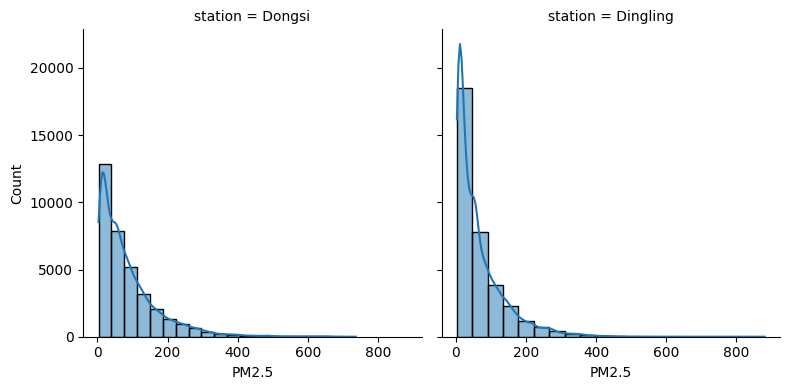

In [19]:
test_df = dataset[(dataset["station"] == highest) | (dataset["station"] == lowest)]

g = sns.FacetGrid(test_df, col="station", height=4, aspect=1)
g.map(sns.histplot, "PM2.5", bins=20, kde=True)

plt.tight_layout()
plt.show()

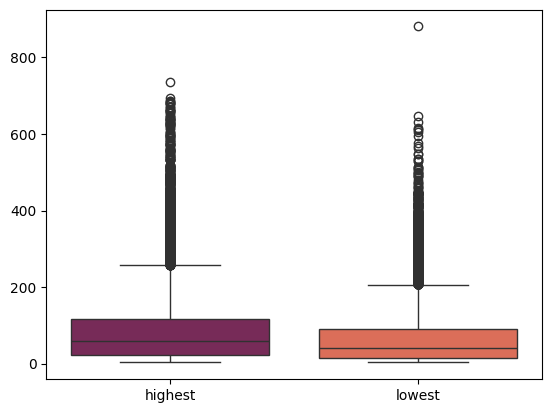

In [20]:
new_df = pd.DataFrame({
    "highest": test_df.loc[test_df["station"] == highest, "PM2.5"],
    "lowest": test_df.loc[test_df["station"] == lowest, "PM2.5"]
})

sns.boxplot(data=new_df[["highest", "lowest"]], palette="rocket")
plt.show()

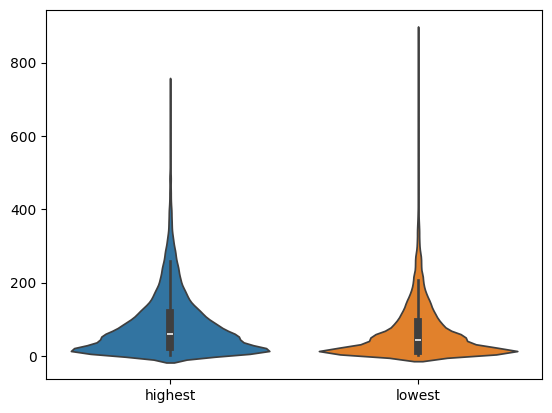

In [21]:
new_df = pd.DataFrame({
    "highest": test_df.loc[test_df["station"] == highest, "PM2.5"],
    "lowest": test_df.loc[test_df["station"] == lowest, "PM2.5"]
})

sns.violinplot(data=new_df[["highest", "lowest"]])
plt.show()

Analisis dilakukan dengan **membandingkan mean dari tingkat PM2.5 pada setiap stasiun** untuk menemukan stasiun dengan rata-rata tingkat
PM2.5 tertinggi dan terendah. Stasiun dengan tingkat PM2.5 tertinggi adalah "Dongsi" sementara stasiun dengan tingkat PM2.5 terendah
adalah "Dingling". Perbedaan mean antara kedua stasiun tersebut adalah sebesar **19.781** dan perbedaan median-nya adalah sebesar **17.0**.

Plotting dilakukan untuk melihat perbedaan distribusi data serta pengaruh outlier. Perbedaan distribusi divisualisasikan menggunakan
histogram dan ditemukan bahwa **distribusi tingkat PM2.5 lebih mendekati distribusi eksponensial dibandingkan distribusi normal**. Sementara
itu, pengaruh outlier divisualisasikan menggunakan boxplot dan ditemukan bahwa stasiun "Dingling" memiliki IQR yang lebih kecil sehingga
data lebih terpusat pada median.

Berdasarkan analisis yang dilakukan, **stasiun dengan tingkat PM2.5 yang rendah cenderung disebabkan oleh median data yang lebih kecil**. Pengaruh
dari nilai ekstrim tidak terlalu signifikan karena nilai maksimum PM2.5 pada stasiun "Dingling" lebih besar daripada stasiun
"Dongsi" walaupun memiliki rata-rata PM2.5 yang lebih rendah. Hal ini berarti, upaya yang dapat dilakukan untuk meningkatkan kualitas udara
adalah dengan lebih berfokus pada solusi yang konsisten dan berjangka panjang.

## Conclusion

Terdapat dua kesimpulan yang dapat diambil dari analisis yang telah dilakukan.
1. Tren perubahan tingkat PM2.5 serupa untuk setiap stasiun dan menunjukkan tren yang menaik. Hal ini menunjukkan bahwa dibutuhkan
   solusi masif dengan skala geografis yang luas untuk menghentikan kenaikan tingkat PM2.5. Solusi ini dibutuhkan segera karena
   tingkat PM2.5 yang kerap naik dari waktu ke waktu.
   
2. Kualitas udara yang baik disebabkan oleh median tingkat PM2.5 yang lebih rendah. Maka dari itu, dibutuhkan solusi jangka panjang
   untuk menurunkan tingkat PM2.5.